In [1]:
#Match GLORYS profiles with CORA - November 2021
import xarray as xr
import dask
import glob
import pandas as pd
import time
import numpy as np
import time
import matplotlib.pyplot as plt
import gsw
import yaml


#Section with PCs and with Levels
import datetime as dt 
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import gsw

import yaml

import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import xarray as xr
import numpy as np
import pandas as pd



import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()

'/home1/datahome/mlejeune'

In [2]:
with open(r'configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


In [3]:
%%time
dir_path = '/home/ref-ocean-reanalysis/global-reanalysis-phy-001-030-daily/'
file = []

cora = xr.open_dataset(configuration['CORA_OUTPUT'] + configuration['OUTPUT_FILE_NAME'])
cora

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 160 ms


<xarray.Dataset>
Dimensions:          (N_PROF: 12466, DEPTH: 51)
Coordinates:
    LONGITUDE        (N_PROF) float64 ...
    LATITUDE         (N_PROF) float64 ...
  * DEPTH            (DEPTH) int64 0 1 2 3 4 5 6 ... 628 697 773 857 950 1000
    TIME             (N_PROF) datetime64[ns] ...
Dimensions without coordinates: N_PROF
Data variables: (12/20)
    TEMP_SURF        (N_PROF, DEPTH) float64 ...
    PSAL_SURF        (N_PROF, DEPTH) float64 ...
    TEMP             (N_PROF, DEPTH) float64 ...
    PSAL             (N_PROF, DEPTH) float64 ...
    DC_REFERENCE     (N_PROF) |S8 ...
    PLATFORM_NUMBER  (N_PROF) |S8 ...
    ...               ...
    VGOSA            (N_PROF) float64 ...
    SLA_err          (N_PROF) float64 ...
    SA               (N_PROF, DEPTH) float64 ...
    CT               (N_PROF, DEPTH) float64 ...
    SIG              (N_PROF, DEPTH) float64 ...
    MLD              (N_PROF) float64 ...

## Extract Glorys12 data

In [ ]:
%%time
dir_path = '/home/ref-ocean-reanalysis/global-reanalysis-phy-001-030-daily'
file = []

spatial_domain = {"lon":[configuration['longitude1'], configuration['longitude2']],
                 "lat": [configuration['latitude2'], configuration['latitude1']], "depth": 1100}


yy = "1993"
mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in range(2005, 2006):
    
    start_time = time.time()

    for mms in mm:
        file = glob.glob(f"{dir_path}/{yy}/{mms}/*_mean_{yy}*.nc")
    
        for files in file:
            day = str(files[106: 108])

            cora_sel = cora.where((cora.TIME.dt.year == int(yy)), drop=True)[['LONGITUDE', 'LATITUDE', 'TIME']]
            ds_full = xr.open_mfdataset(files)

            glorys_sel = ds_full.sel(longitude=slice(spatial_domain['lon'][0], spatial_domain['lon'][1]),
                            latitude=slice(spatial_domain['lat'][0], spatial_domain['lat'][1]),
                            depth=slice(0, spatial_domain['depth']))

            # glorys_sel = glorys_sel.sel(dict(longitude=cora_sel['LONGITUDE'], latitude=cora_sel['LATITUDE'], time=cora_sel['TIME']), method='nearest')
            glorys_sel.to_netcdf(f'/home/datawork-lops-bluecloud/osnet/data_out/bootstrap/OsNet_test_Nordic_Sea/glorys_test/{yy}/GLORYS_{yy}{mms}{day}.nc')
    
        print(f"year {yy} {mms} finished in {time.time() - start_time}")


year 2005 01 finished in 93.16000366210938
year 2005 02 finished in 184.47663521766663


In [17]:
cora = xr.open_dataset(configuration['CORA_OUTPUT'] + configuration['OUTPUT_FILE_NAME'])
cora = cora.where(cora.TIME.dt.year<=1994
              ,drop = True)
cora = cora.where(cora.TIME.dt.year>=1993,drop = True)
cora.sortby('TIME') 
cora

<xarray.Dataset>
Dimensions:          (N_PROF: 443, DEPTH: 51)
Coordinates:
    LONGITUDE        (N_PROF) float64 -1.368 -1.788 -2.509 ... -1.864 -0.934
    LATITUDE         (N_PROF) float64 76.54 76.47 76.33 ... 70.4 70.01 69.62
  * DEPTH            (DEPTH) int64 0 1 2 3 4 5 6 ... 628 697 773 857 950 1000
    TIME             (N_PROF) datetime64[ns] 1993-05-31T00:47:00 ... 1994-11-...
Dimensions without coordinates: N_PROF
Data variables: (12/20)
    TEMP_SURF        (N_PROF, DEPTH) float64 0.3377 0.3377 ... -0.2668 -0.3507
    PSAL_SURF        (N_PROF, DEPTH) float64 34.85 34.85 34.85 ... 34.9 34.9
    TEMP             (N_PROF, DEPTH) float64 0.3377 0.3377 ... -0.2668 -0.3507
    PSAL             (N_PROF, DEPTH) float64 34.85 34.85 34.85 ... 34.9 34.9
    DC_REFERENCE     (N_PROF) object b'61683535' b'61683536' ... b'11413783'
    PLATFORM_NUMBER  (N_PROF) object b'DESI' b'DESI' b'DESI' ... b'LDGJ' b'LDGJ'
    ...               ...
    VGOSA            (N_PROF) float64 -0.0231 -0.0146 ... -0.0421 -0.0985
    SLA_err          (N_PROF) float64 0.0143 0.0129 0.0126 ... 0.0148 0.0183
    SA               (N_PROF, DEPTH) float64 35.01 35.01 35.01 ... 35.07 35.07
    CT               (N_PROF, DEPTH) float64 0.338 0.3379 ... -0.3055 -0.3911
    SIG              (N_PROF, DEPTH) float64 27.97 27.97 27.97 ... 28.04 28.05
    MLD              (N_PROF) float64 100.0 16.0 75.0 26.0 ... 40.0 30.0 35.0

In [18]:
%%time

dir_path = '/home1/datahome/mlejeune/assets/Glorys_sel/'
file = []

for yy in np.arange(1993, 1995):
    start_time = time.time()

    file = glob.glob(f"/home/datawork-lops-bluecloud/osnet/data_out/bootstrap/OsNet_test_Nordic_Sea/glorys_test/{yy}/GLORYS_{yy}*.nc")
    
    cora_sel = cora.where((cora.TIME.dt.year == int(yy)), drop=True)[['LONGITUDE', 'LATITUDE', 'TIME']]
    glorys = xr.open_mfdataset(file)

    glorys_sel = glorys.sel(dict(longitude=cora_sel['LONGITUDE'], latitude=cora_sel['LATITUDE'], time=cora_sel['TIME']), method='nearest')
    glorys_sel.to_netcdf(f'/home1/datahome/mlejeune/assets/GLORYS_interp/GLORYS_cora_{yy}.nc')
    print(f"year {yy} finished in {time.time() - start_time}")

year 1993 finished in 26.35296940803528
year 1994 finished in 23.091917514801025
CPU times: user 28.6 s, sys: 3.41 s, total: 32.1 s
Wall time: 49.4 s


## Interpolation bewteen CORA & Glorys12

In [21]:
test = xr.open_dataset("/home1/datahome/mlejeune/assets/GLORYS_interp/GLORYS_cora_1994.nc")
test

<xarray.Dataset>
Dimensions:    (N_PROF: 138, depth: 36)
Coordinates:
    longitude  (N_PROF) float32 ...
    latitude   (N_PROF) float32 ...
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 763.3 902.3 1.062e+03
    time       (N_PROF) datetime64[ns] ...
    LONGITUDE  (N_PROF) float64 ...
    LATITUDE   (N_PROF) float64 ...
    TIME       (N_PROF) datetime64[ns] ...
Dimensions without coordinates: N_PROF
Data variables:
    mlotst     (N_PROF) float32 ...
    zos        (N_PROF) float32 ...
    bottomT    (N_PROF) float32 ...
    sithick    (N_PROF) float32 ...
    siconc     (N_PROF) float32 ...
    usi        (N_PROF) float32 ...
    vsi        (N_PROF) float32 ...
    thetao     (N_PROF, depth) float32 ...
    so         (N_PROF, depth) float32 ...
    uo         (N_PROF, depth) float32 ...
    vo         (N_PROF, depth) float32 ...
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2017/04/14 17:03:12 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [19]:
#Combine
glorys = xr.open_mfdataset(f'/home1/datahome/mlejeune/assets/GLORYS_interp/*.nc', combine='nested', concat_dim='N_PROF').load()
glorys = glorys.sortby('TIME')
cora = cora.sortby('TIME')
glorys

ValueError: 'to' is not present in all datasets.

In [39]:
#Save in situ temp and not potential temp
SA_pred = gsw.SA_from_SP(glorys['so'], glorys['depth'], glorys['longitude'], glorys['latitude'])
CT_pred = gsw.CT_from_pt(glorys['so'], glorys['thetao'])
to = gsw.t_from_CT(SA_pred, CT_pred, glorys['depth'])
glorys = glorys.assign(variables={"to": (('N_PROF', 'depth'), to.data)})
glorys

<xarray.Dataset>
Dimensions:        (N_PROF: 440, depth: 36)
Coordinates:
    longitude      (N_PROF) float32 -9.5 -9.417 -9.0 -8.0 ... 0.0 0.0 0.5 0.5
    latitude       (N_PROF) float32 75.0 75.0 75.0 75.0 ... 74.75 74.75 74.75
  * depth          (depth) float32 0.494 1.541 2.646 ... 763.3 902.3 1.062e+03
    time           (N_PROF) datetime64[ns] 1995-02-24T12:00:00 ... 1996-12-01...
    LONGITUDE      (N_PROF) float64 -9.53 -9.38 -9.0 ... 0.0048 0.5018 0.5018
    LATITUDE       (N_PROF) float64 74.98 75.0 75.0 75.0 ... 74.75 74.75 74.75
    TIME           (N_PROF) datetime64[ns] 1995-02-24T17:19:12.000000256 ... ...
Dimensions without coordinates: N_PROF
Data variables: (12/25)
    mlotst         (N_PROF) float32 1.816e+03 1.769e+03 ... 52.64 52.64
    zos            (N_PROF) float32 -0.9915 -0.9928 -1.003 ... -0.9436 -0.9436
    bottomT        (N_PROF) float32 -1.2 -1.201 -1.209 ... -1.215 -1.219 -1.219
    sithick        (N_PROF) float32 0.05417 0.05112 ... 0.000763 0.000763
    siconc         (N_PROF) float32 0.01022 0.01015 ... 0.0004196 0.0004196
    usi            (N_PROF) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...             ...
    SIG_predicted  (N_PROF, depth) float64 28.06 28.06 28.06 ... 28.06 28.07
    ae_so_surf     (N_PROF, depth) float64 nan nan nan ... 0.005968 0.005932 nan
    ae_to_surf     (N_PROF, depth) float64 nan nan nan ... 0.03462 0.02488 nan
    ae_SIG         (N_PROF, depth) float64 0.02874 0.02998 ... 0.003778 nan
    ae_so          (N_PROF, depth) float64 0.01007 0.0116 ... 0.005932 nan
    ae_to          (N_PROF, depth) float64 0.4204 0.4204 0.4203 ... 0.02488 nan
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2017/04/21 11:56:06 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [40]:
#Interpolate CORA on depth
cora = cora.assign_coords({'depth': glorys.depth})
corai = cora.interp(DEPTH=glorys.depth, method = 'linear')

corai

<xarray.Dataset>
Dimensions:          (N_PROF: 1769, depth: 36)
Coordinates:
    LONGITUDE        (N_PROF) float64 3.008 3.008 3.275 ... 2.428 4.979 4.979
    LATITUDE         (N_PROF) float64 74.5 74.5 74.66 ... 72.07 71.39 71.39
    TIME             (N_PROF) datetime64[ns] 1993-02-13T15:10:00 ... 1999-11-...
    DEPTH            (depth) float32 0.494 1.541 2.646 ... 763.3 902.3 1.062e+03
  * depth            (depth) float32 0.494 1.541 2.646 ... 763.3 902.3 1.062e+03
Dimensions without coordinates: N_PROF
Data variables: (12/20)
    TEMP_SURF        (N_PROF, depth) float64 -1.849 -1.849 ... -0.07002 nan
    PSAL_SURF        (N_PROF, depth) float64 34.64 34.64 34.64 ... 34.88 nan
    TEMP             (N_PROF, depth) float64 -1.849 -1.849 ... -0.07002 nan
    PSAL             (N_PROF, depth) float64 34.64 34.64 34.64 ... 34.88 nan
    DC_REFERENCE     (N_PROF) object b'61613936' b'2637806' ... b'61668315'
    PLATFORM_NUMBER  (N_PROF) object b'DESI' b'DESI' b'DESI' ... b'LDGJ' b'LDGJ'
    ...               ...
    VGOSA            (N_PROF) float64 -0.0175 -0.0175 ... -0.0718 -0.0718
    SLA_err          (N_PROF) float64 0.0176 0.0176 0.0184 ... 0.0218 0.0218
    SA               (N_PROF, depth) float64 34.8 34.8 34.8 ... 35.05 35.05 nan
    CT               (N_PROF, depth) float64 -1.846 -1.846 ... -0.1079 nan
    SIG              (N_PROF, depth) float64 27.89 27.89 27.89 ... 28.02 nan
    MLD              (N_PROF) float64 110.0 110.0 60.0 ... 100.0 133.0 133.0

In [41]:
cora = cora.assign(variables={"TEMP_SURFd": (('N_PROF', 'depth'), corai.TEMP_SURF.data)})
cora = cora.assign(variables={"PSAL_SURFd": (('N_PROF', 'depth'), corai.PSAL_SURF.data)})
cora = cora.assign(variables={"TEMPd": (('N_PROF', 'depth'), corai.TEMP.data)})
cora = cora.assign(variables={"PSALd": (('N_PROF', 'depth'), corai.PSAL.data)})

In [42]:
#Compute SA and CT
SA = gsw.SA_from_SP(cora['PSALd'], cora['depth'], cora['LONGITUDE'], cora['LATITUDE'])
CT = gsw.CT_from_t(cora['PSALd'], cora['TEMPd'], cora['depth'])
SIG = gsw.sigma0(SA,CT)
glorys = glorys.assign(variables={"SA": (('N_PROF', 'depth'), SA.data)})
glorys = glorys.assign(variables={"CT": (('N_PROF', 'depth'), CT.data)})
glorys = glorys.assign(variables={"TEMP": (('N_PROF', 'depth'), corai.TEMP.data)})
glorys = glorys.assign(variables={"PSAL": (('N_PROF', 'depth'), corai.PSAL.data)})
glorys = glorys.assign(variables={"SIG": (('N_PROF', 'depth'), SIG.data)})

#Compute SA and CT predicted
SA_predicted = gsw.SA_from_SP(glorys['so'], glorys['depth'], glorys['longitude'], glorys['latitude'])
CT_predicted = gsw.CT_from_t(glorys['so'], glorys['to'].data, glorys['depth'])
SIG_predicted = gsw.sigma0(SA_predicted,CT_predicted)
glorys = glorys.assign(variables={"SA_predicted": (('N_PROF', 'depth'), SA_predicted.data)})
glorys = glorys.assign(variables={"CT_predicted": (('N_PROF', 'depth'), CT_predicted.data)})
glorys = glorys.assign(variables={"SIG_predicted": (('N_PROF', 'depth'), SIG_predicted.data)})
#

ValueError: conflicting sizes for dimension 'N_PROF': length 1769 on 'SA' and length 440 on {'N_PROF': 'longitude', 'depth': 'depth'}

In [12]:
glorys

<xarray.Dataset>
Dimensions:        (N_PROF: 440, depth: 36)
Coordinates:
    longitude      (N_PROF) float32 -9.5 -9.417 -9.0 -8.0 ... 0.0 0.0 0.5 0.5
    latitude       (N_PROF) float32 75.0 75.0 75.0 75.0 ... 74.75 74.75 74.75
  * depth          (depth) float32 0.494 1.541 2.646 ... 763.3 902.3 1.062e+03
    time           (N_PROF) datetime64[ns] 1995-02-24T12:00:00 ... 1996-12-01...
    LONGITUDE      (N_PROF) float64 -9.53 -9.38 -9.0 ... 0.0048 0.5018 0.5018
    LATITUDE       (N_PROF) float64 74.98 75.0 75.0 75.0 ... 74.75 74.75 74.75
    TIME           (N_PROF) datetime64[ns] 1995-02-24T17:19:12.000000256 ... ...
Dimensions without coordinates: N_PROF
Data variables: (12/20)
    mlotst         (N_PROF) float32 1.816e+03 1.769e+03 ... 52.64 52.64
    zos            (N_PROF) float32 -0.9915 -0.9928 -1.003 ... -0.9436 -0.9436
    bottomT        (N_PROF) float32 -1.2 -1.201 -1.209 ... -1.215 -1.219 -1.219
    sithick        (N_PROF) float32 0.05417 0.05112 ... 0.000763 0.000763
    siconc         (N_PROF) float32 0.01022 0.01015 ... 0.0004196 0.0004196
    usi            (N_PROF) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...             ...
    TEMP           (N_PROF, depth) float64 -0.17 -0.17 -0.17 ... -0.9039 nan
    PSAL           (N_PROF, depth) float64 34.9 34.9 34.9 ... 34.88 34.88 nan
    SIG            (N_PROF, depth) float64 28.03 28.03 28.03 ... 28.06 28.06 nan
    SA_predicted   (N_PROF, depth) float64 35.07 35.07 35.07 ... 35.06 35.06
    CT_predicted   (N_PROF, depth) float64 -0.5887 -0.5887 ... -0.909 -0.9118
    SIG_predicted  (N_PROF, depth) float64 28.06 28.06 28.06 ... 28.06 28.07
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2017/04/21 11:56:06 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [13]:
ae_so_surf = xr.ufuncs.fabs(cora['PSAL_SURFd']- glorys['so'])
ae_to_surf = xr.ufuncs.fabs(cora['TEMP_SURFd']- glorys['to'])
ae_SIG = xr.ufuncs.fabs(glorys['SIG']- glorys['SIG_predicted'])

glorys = glorys.assign(variables={"ae_so_surf": (('N_PROF', 'depth'), ae_so_surf.data)})
glorys = glorys.assign(variables={"ae_to_surf": (('N_PROF', 'depth'), ae_to_surf.data)})
glorys = glorys.assign(variables={"ae_SIG": (('N_PROF', 'depth'), ae_SIG.data)})

ae_so = xr.ufuncs.fabs(cora['PSALd']- glorys['so'])
ae_to = xr.ufuncs.fabs(cora['TEMPd']- glorys['to'])
glorys = glorys.assign(variables={"ae_so": (('N_PROF', 'depth'), ae_so.data)})
glorys = glorys.assign(variables={"ae_to": (('N_PROF', 'depth'), ae_to.data)})

Text(0.5, 0.98, 'absolute error between Glorys12 prediction and CORA profiles')

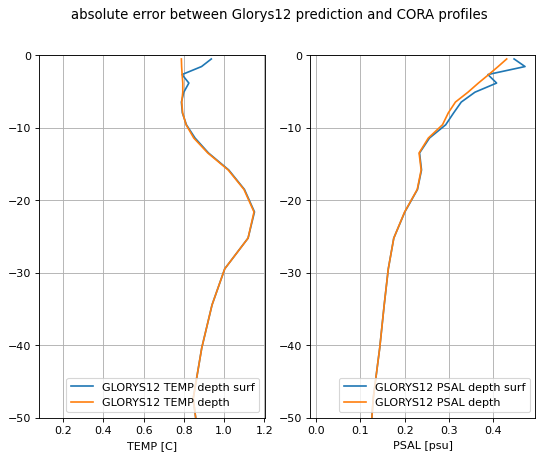

In [14]:
def rmse_from_ae(ae):
    return np.sqrt(((ae) ** 2).mean(axis=0))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
ax[0].plot(rmse_from_ae(glorys['ae_to_surf']), -glorys['depth'], label='GLORYS12 TEMP depth surf')
ax[0].plot(rmse_from_ae(glorys['ae_to']), -glorys['depth'], label='GLORYS12 TEMP depth')
ax[0].set_xlabel('TEMP [C]')
ax[0].set_ylim([-50,0])
ax[0].grid()
ax[0].legend(loc='lower right')

ax[1].plot(rmse_from_ae(glorys['ae_so_surf']), -glorys['depth'], label='GLORYS12 PSAL depth surf')
ax[1].plot(rmse_from_ae(glorys['ae_so']), -glorys['depth'], label='GLORYS12 PSAL depth')
ax[1].set_xlabel('PSAL [psu]')
ax[1].set_ylim([-50,0])
ax[1].grid()
plt.legend(loc='lower right')

fig.suptitle(f'absolute error between Glorys12 prediction and CORA profiles')

In [15]:
glorys.to_netcdf(f'/home1/datahome/mlejeune/assets/GLORYS_interp/GLORYS_Interp_Final.nc')